<a href="https://colab.research.google.com/github/shailavij/Hello-World/blob/master/AUTOMPG_Regression_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# use seaborn for pairplot
! pip install -g seaborn


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -g


# Problem STAT : TO predict Fuel efficiency Using Keras


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas  as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

Using TensorFlow backend.


In [3]:
# Load DAta

ds=tf.keras.utils.get_file("auto-mpg.data","http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
ds




32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [4]:
column_name=['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_ds=pd.read_csv(ds,names=column_name, na_values="?",comment='\t',sep=" ",skipinitialspace=True)
raw_ds.tail()

#dataset=raw_ds.copy()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [0]:
#  to find syntax parameter use QUestion mark  in front ,    ?pd.read_csv()

In [6]:
raw_ds.shape

(398, 8)

In [7]:
# Data Preprocessing
# Chk for NAN value or missing value

raw_ds.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
# Drop NA values
raw_ds=raw_ds.dropna()

In [9]:
raw_ds.shape

(392, 8)

In [0]:
# The "Origin" column is really categorical, not numeric. So convert that to a one-hot:

org = raw_ds.pop('Origin')



In [11]:
org.shape


(392,)

In [12]:
# One_Hot Encoding


raw_ds['USA'] = (org == 1)*1.0
raw_ds['Europe'] = (org == 2)*1.0
raw_ds['Japan'] = (org == 3)*1.0
raw_ds.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [0]:
Split the data into train and test
Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.


In [14]:
train_data= raw_ds.sample(frac=0.8,random_state=0)
test_data= raw_ds.drop(train_data.index)  # dropping train data index, will get remaining 20% of test data

print("train_shape",train_data.shape)
print("test_shape",test_data.shape)
print(test_data.index)
print(train_data.index)

train_shape (314, 10)
test_shape (78, 10)
Int64Index([  9,  25,  28,  31,  33,  39,  40,  43,  48,  54,  58,  71,  73,
             83,  85,  88,  89,  92, 100, 106, 116, 118, 120, 122, 129, 130,
            133, 149, 153, 165, 167, 174, 176, 179, 185, 187, 194, 195, 197,
            199, 204, 205, 213, 244, 245, 246, 253, 259, 264, 267, 269, 275,
            279, 287, 290, 292, 293, 294, 316, 323, 325, 337, 339, 341, 342,
            343, 349, 351, 353, 359, 363, 364, 367, 369, 375, 382, 384, 396],
           dtype='int64')
Int64Index([146, 282,  69, 378, 331, 257, 310, 328, 125, 108,
            ...
            171,  70, 307,  49, 209, 281, 229, 150, 145, 182],
           dtype='int64', length=314)


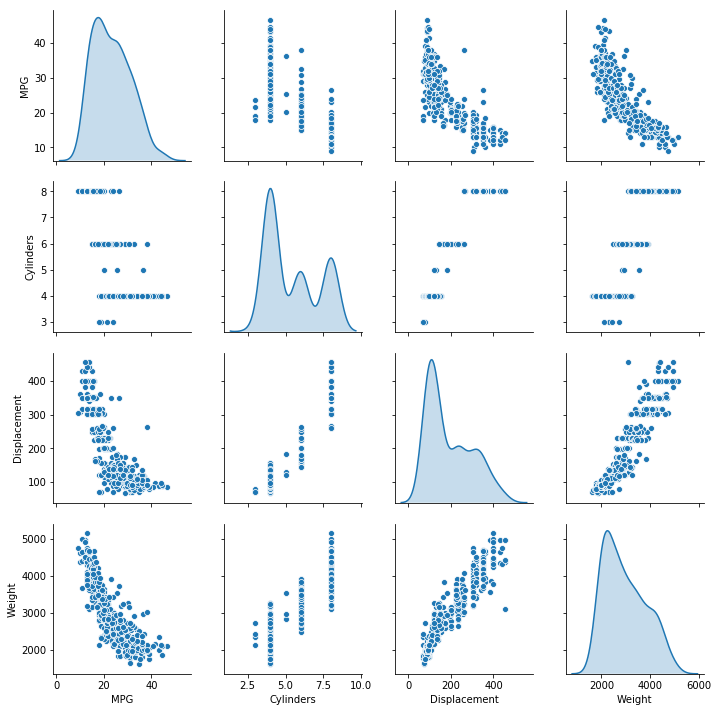

In [15]:
# EDA 
sns.pairplot(raw_ds[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
plt.show()

In [16]:
# Chk summary of data

train_stat =train_data.describe()
train_stat.pop("MPG")
train_stat =train_stat.transpose()
train_stat



,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [17]:
train_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0


Split features from labels
Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [0]:
# Target Feature ("MPG") added in "train_label1" variable
# Here Pop function will remeove target column from train_data ds
# Dependent & independent variables are defined

train_lable1=train_data.pop("MPG")
test_lable1=test_data.pop("MPG")

In [19]:
train_data.shape

(314, 9)

In [20]:
train_lable1.shape

(314,)

Normalize the data
Look again at the train_stats block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

In [0]:
# define function for normalize  (Z_score formular x-mean/std.)
def norm(x):
  return (x- train_stat['mean'])/ train_stat['std']

In [0]:

norm_train_data= norm(train_data)
norm_test_data=norm(test_data)
#norm_train_data1=norm_train_data.pop("MPG")

In [23]:
norm_train_data.describe()
#norm_train_data.shape

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02
mean,2.093159e-16,1.018294e-16,-1.909301e-17,-9.723291e-17,2.688832e-15,9.561531e-16,6.081476e-17,8.485781e-18,3.164489e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.457657e+00,-1.220325e+00,-1.545283e+00,-1.589352e+00,-2.710152e+00,-1.604642e+00,-1.286751e+00,-4.651484e-01,-4.952254e-01
25%,-8.693480e-01,-8.608943e-01,-7.512407e-01,-8.694784e-01,-6.307245e-01,-7.884578e-01,-1.286751e+00,-4.651484e-01,-4.952254e-01
50%,-8.693480e-01,-4.247848e-01,-2.721905e-01,-1.987817e-01,-2.123729e-02,2.772599e-02,7.746764e-01,-4.651484e-01,-4.952254e-01
75%,1.483887e+00,6.750739e-01,6.071620e-01,7.320173e-01,5.882500e-01,8.439098e-01,7.746764e-01,-4.651484e-01,-4.952254e-01
max,1.483887e+00,2.489002e+00,3.153347e+00,2.547401e+00,3.313017e+00,1.660094e+00,7.746764e-01,2.143005e+00,2.012852e+00


**Build the mode**l
Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, **build_model**, since we'll create a second model, later on.


In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [25]:
model=build_model()

W0826 22:46:19.650372 140460913727360 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
# Inspect model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Predict the model
exam_batch=norm_train_data[:10]
exam_result=model.predict(exam_batch)
exam_result

array([[-0.25938678],
       [ 0.06592689],
       [-0.39035672],
       [-0.05563653],
       [-0.38085935],
       [ 0.25507352],
       [-0.34497046],
       [-0.26123413],
       [-0.03562972],
       [-0.01742485]], dtype=float32)

In [28]:
raw_ds[60:69]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
61,21.0,4,122.0,86.0,2226.0,16.5,72,1.0,0.0,0.0
62,13.0,8,350.0,165.0,4274.0,12.0,72,1.0,0.0,0.0
63,14.0,8,400.0,175.0,4385.0,12.0,72,1.0,0.0,0.0
64,15.0,8,318.0,150.0,4135.0,13.5,72,1.0,0.0,0.0
65,14.0,8,351.0,153.0,4129.0,13.0,72,1.0,0.0,0.0
66,17.0,8,304.0,150.0,3672.0,11.5,72,1.0,0.0,0.0
67,11.0,8,429.0,208.0,4633.0,11.0,72,1.0,0.0,0.0
68,13.0,8,350.0,155.0,4502.0,13.5,72,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0


In [29]:
train_data.head(10)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0
257,6,232.0,90.0,3210.0,17.2,78,1.0,0.0,0.0
310,4,89.0,60.0,1968.0,18.8,80,0.0,0.0,1.0
328,4,146.0,67.0,3250.0,21.8,80,0.0,1.0,0.0
125,6,198.0,95.0,3102.0,16.5,74,1.0,0.0,0.0
108,4,97.0,88.0,2279.0,19.0,73,0.0,0.0,1.0


**Train the model**
Train the model for 1000 epochs, and record the training and validation accuracy in the history object

In [30]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  norm_train_data, train_lable1,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.501298,1.031149,2.501298,9.873695,2.345865,9.873695,995
996,2.838892,1.105263,2.838892,9.280701,2.260775,9.280701,996
997,2.700987,1.060767,2.700988,9.511984,2.340515,9.511984,997
998,2.636527,1.062108,2.636527,8.652739,2.235115,8.652739,998
999,2.586498,1.045513,2.586498,9.348392,2.279574,9.348392,999


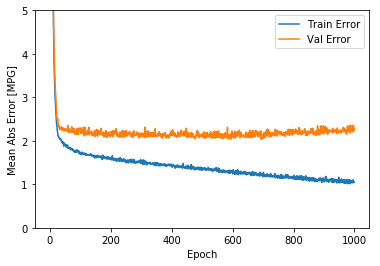

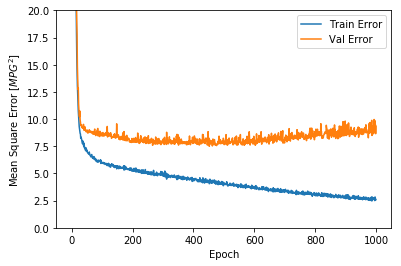

In [32]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the model.fit call to automatically stop training when the **validation score doesn't improve**. We'll use an **EarlyStopping callback** that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.


.......................................................................

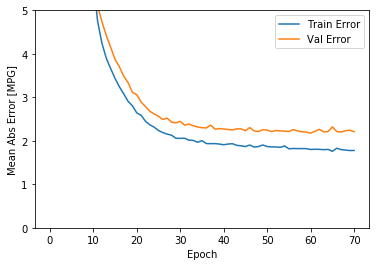

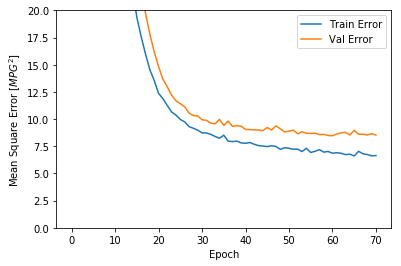

In [34]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(norm_train_data, train_lable1, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [36]:
# Evaluate with TEst data
loss, mae, mse = model.evaluate(norm_test_data, test_lable1, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.80 MPG


TEST_predict [15.971376 10.905614 10.841251 23.160788 21.27249  13.131509 13.321923
 12.841052 19.46405  29.606567]
Test_Label 9     15.0
25    10.0
28     9.0
31    25.0
33    19.0
39    14.0
40    14.0
43    13.0
48    18.0
54    35.0
Name: MPG, dtype: float64


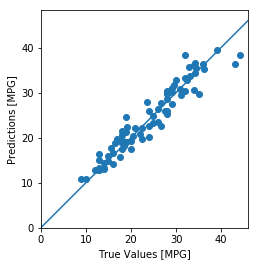

In [68]:
test_predictions = model.predict(norm_test_data).flatten()

plt.scatter(test_lable1, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


print("TEST_predict",test_predictions[:10])
print("Test_Label",test_lable1[:10])

Text(0, 0.5, 'Count')

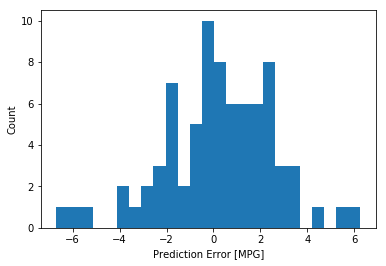

In [54]:
# Error distribution

error =test_predictions- test_lable1
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")

It's **not quite gaussian**, but we might expect that because the number of samples is very small.